# EDA and visualization
This notebook is more of a sandbox for when I was exploring the compiled text file ('compiled_lafferty'). Some images here will be exported and can be found in the image folder or the PDF presentation.

In [ ]:
# import libraries and set style for graphs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

sns.set_style("dark")

In [ ]:
# read in the compiled text file
with open("/content/compiled_lafferty.txt") as f:
    text = f.read()

In [ ]:
# LOL... I hope this is the right thing to do. ;P I'm just doing this so I can use Pandas
corpus = []
corpus.append(text)

In [ ]:
# using CountVectorizer and stop words
cvec = CountVectorizer(stop_words='english')

In [ ]:
# fit the corpus on CountVectorizer
cvec.fit(corpus)

CountVectorizer(stop_words='english')

In [ ]:
# transform the corpus
corpus_t = cvec.transform(corpus)

## Time to look around...

In [ ]:
corpus_t.shape

(1, 35469)

In [ ]:
type(corpus_t)

scipy.sparse.csr.csr_matrix

In [ ]:
# let's make a dataframe
df = pd.DataFrame(corpus_t.todense(), columns=cvec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df.shape 

(1, 35469)

In [ ]:
df = df.drop(['don', 'll'], axis=1)

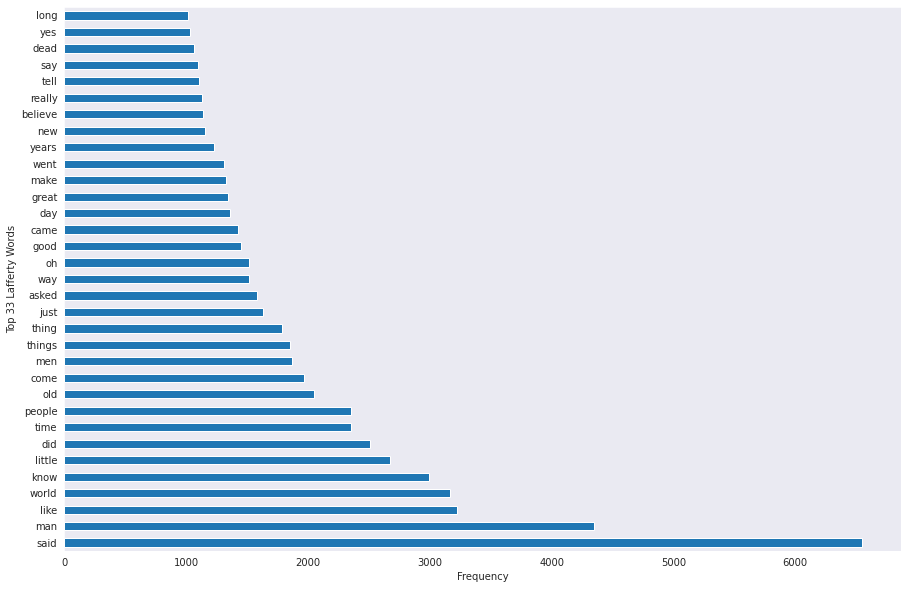

In [ ]:
plt.figure(figsize=(15,10))
# plotting the top 33 words in the corpus
df.sum().sort_values(ascending=False)[:33].plot(kind='barh')

plt.ylabel('Top 33 Lafferty Words')
plt.xlabel('Frequency')
plt.savefig("top_33_words_lafferty.png")

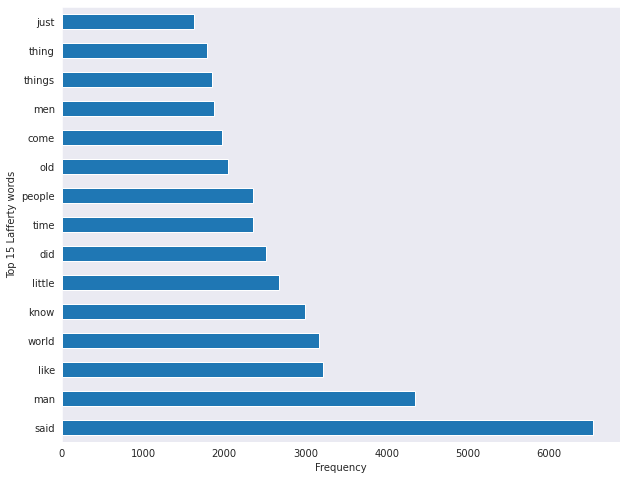

In [ ]:
plt.figure(figsize=(10,8))
# plotting the top 15 words in the corpus
df.sum().sort_values(ascending=False)[:15].plot(kind='barh')

plt.ylabel('Top 15 Lafferty words')
plt.xlabel('Frequency')
plt.savefig("top_15_words_lafferty.png")

In [ ]:
bigrams_cv = CountVectorizer(ngram_range=(2,2))

In [ ]:
bigrams_cv.fit(corpus)

CountVectorizer(ngram_range=(2, 2))

In [ ]:
bigrams = bigrams_cv.transform(corpus)

In [ ]:
bigrams_df = pd.DataFrame(bigrams.todense(), columns=bigrams_cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


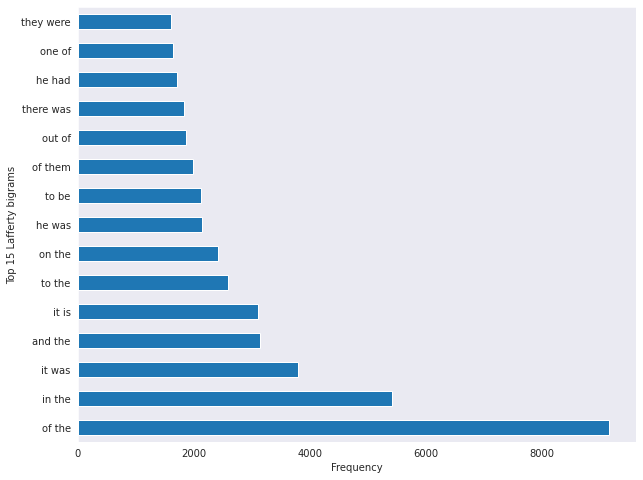

In [ ]:
plt.figure(figsize=(10,8))
bigrams_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')

plt.ylabel('Top 15 Lafferty bigrams')
plt.xlabel('Frequency')
plt.savefig("top_15_bigrams_lafferty.png")

In [ ]:
trigrams_cv = CountVectorizer(ngram_range=(3,3))

In [ ]:
trigrams_cv.fit(corpus)

CountVectorizer(ngram_range=(3, 3))

In [ ]:
trigrams = trigrams_cv.transform(corpus)

In [ ]:
trigrams_df = pd.DataFrame(trigrams.todense(), columns=trigrams_cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


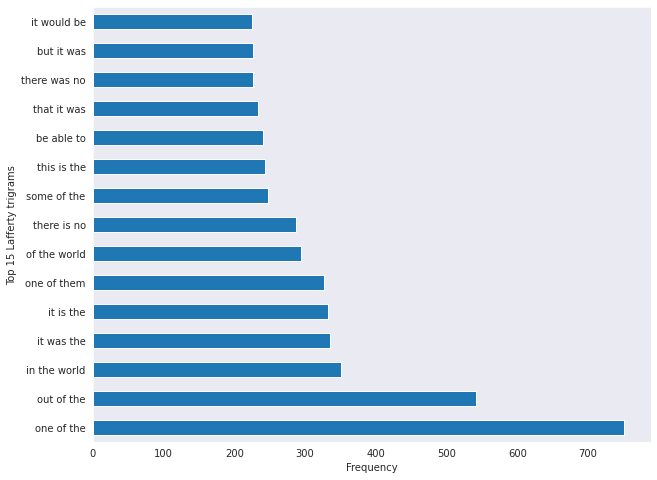

In [ ]:
plt.figure(figsize=(10,8))
trigrams_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')

plt.ylabel('Top 15 Lafferty trigrams')
plt.xlabel('Frequency')
plt.savefig("top_15_trigrams_lafferty.png")

### wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

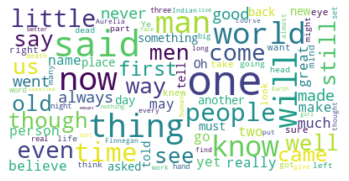

<Figure size 432x288 with 0 Axes>

In [ ]:
# https://www.datacamp.com/community/tutorials/wordcloud-python
# create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('lafferty_cloud.png')

### n-grams

In [ ]:
# df_bigram.sum().sort_values(ascending=False)[:33].plot(kind='barh')

### scattertext

In [ ]:
# this needs to be run in Google Colab
# pip install scattertext

In [ ]:
# this needs to be run in Google Colab
# pip install textstat # https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

In [ ]:
from textstat import flesch_reading_ease

In [ ]:
# read in isaac asimov text
with open("/content/isaac_asimov_foundation.txt") as f:
    ia_text = f.read()

In [ ]:
# read in philp k dick text
with open("/content/philip_k_dick_variable_man.txt") as f:
    pkd_text = f.read()

In [ ]:
# ra lafferty score
flesch_reading_ease(text)

86.44

In [ ]:
# philip k dick score
flesch_reading_ease(pkd_text)

82.65

In [ ]:
# isaac asimov score
flesch_reading_ease(ia_text)

66.07

### spaCy library

In [ ]:
# https://stackoverflow.com/questions/56927602/unable-to-load-the-spacy-model-en-core-web-lg-on-google-colab

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
# import en_core_web_lg # more info on models at @ https://spacy.io/models/en
nlp = spacy.load('en_core_web_lg')

OSError: ignored